In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# if you have not install scikit-learn, run "conda install scikit-learn" in your gct634 environment
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import mixture



# PCA

### Loading Input Data

(4996, 513)


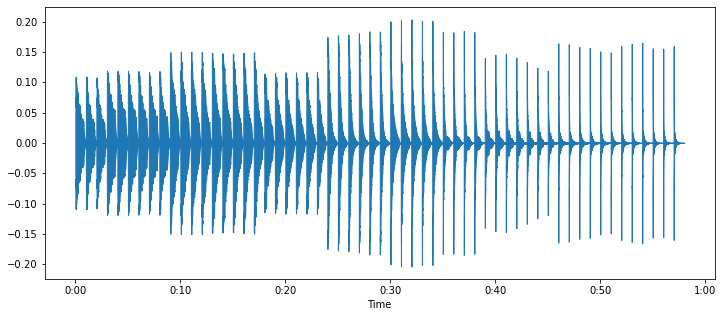

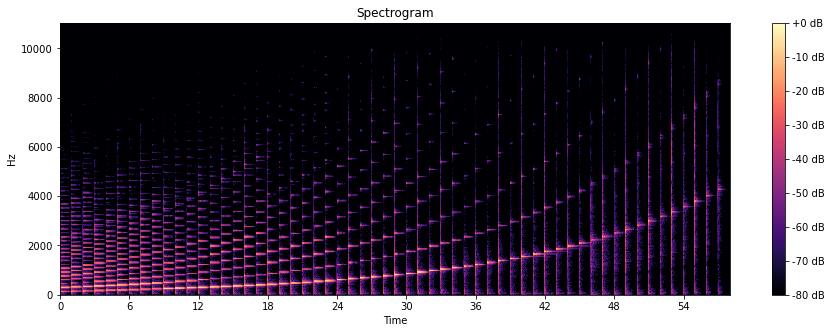

In [2]:

# input audio
filename = "../audio/piano_88keys_short_vel96_part2.wav"

y, sr = librosa.load(filename) 

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y, sr=sr)

# STFT
S_full, phase = librosa.magphase(librosa.stft(y, n_fft=1024, window='hann', hop_length=256, win_length=1024))
n = len(y)

fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(librosa.amplitude_to_db(S_full,ref=np.max), hop_length=256, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')

# Check the shape of matrix: row must corresponds to the example index !!!
X = S_full.T
print (X.shape)


ipd.Audio(y, rate=sr) 


### Observing the variances 

[0.12749067 0.11032784 0.08517417 0.06549226 0.0590949 ]


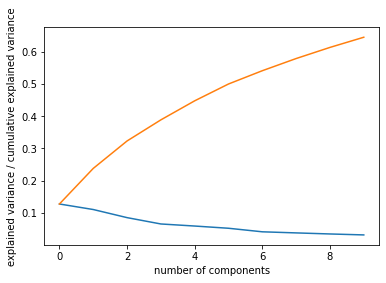

In [3]:
#pca = PCA()
pca = PCA(n_components=10)
#pca = PCA(0.99) # accumulated variances

# training
pca.fit(X)

print(pca.explained_variance_ratio_[:5])
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance / cumulative explained variance');


### Visualization Using PCA

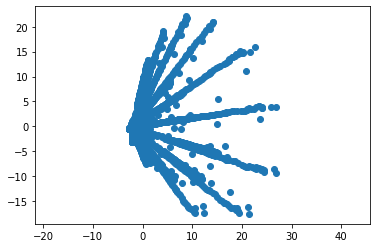

In [4]:
pca = PCA(n_components=2)

# training
pca.fit(X)
X_pca = pca.transform(X)

# display 
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.axis('equal');


### Data Compression Using PCA

(4996, 513)
(4996, 23)
(4996, 513)


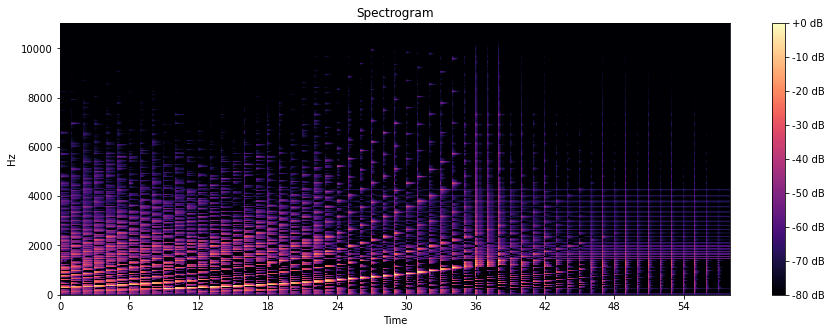

In [5]:
pca = PCA(0.9)
#print(pca.n_components)

# training
pca.fit(X)

# PCA transform 
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

# reconstruction
X_recon = pca.inverse_transform(X_pca)
print(X_recon.shape)

# set negatives to zero 
X_recon[X_recon<0] = 0

X_recon = X_recon.T

# inverse STFT
y_hat = librosa.istft(X_recon*np.exp(phase), window='hann', hop_length=256, win_length=1024, length=n)

fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(librosa.amplitude_to_db(X_recon,ref=np.max), hop_length=256, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')

ipd.Audio(y_hat, rate=sr)

# K-Means Clustering

### loading audio

(359, 513)


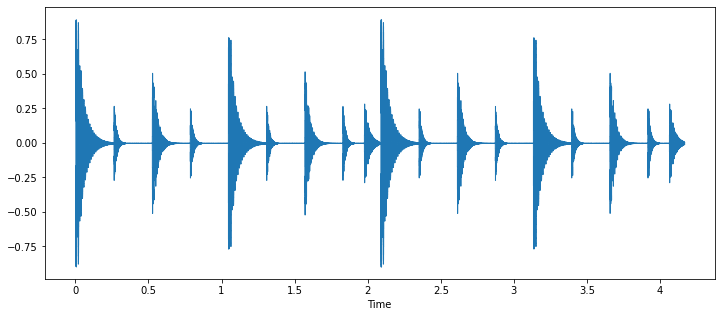

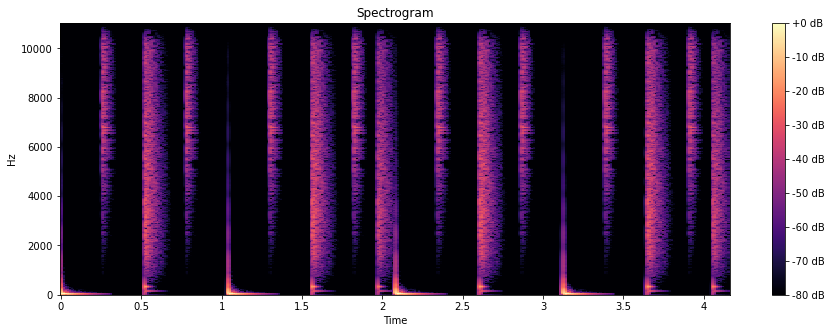

In [7]:

# input audio
filename = "../audio/beatbox.wav"

y, sr = librosa.load(filename) 


plt.figure(figsize=(12, 5))
librosa.display.waveshow(y, sr=sr)


# STFT
S_full, phase = librosa.magphase(librosa.stft(y, n_fft=1024, window='hann', hop_length=256, win_length=1024))
n = len(y)

fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(librosa.amplitude_to_db(S_full,ref=np.max), hop_length=256, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')

# Check the shape of matrix: row must corresponds to the example index !!!
X = S_full.T
print (X.shape)


ipd.Audio(y, rate=sr) 


### Vector Quantization Using K-means

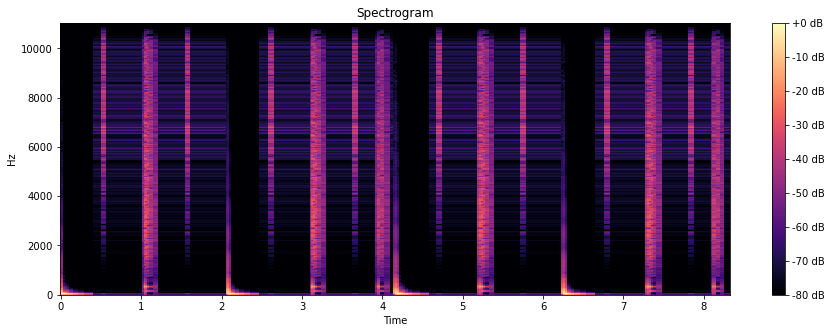

In [11]:

# K-Means Clustering

K = 20
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

X_rec = np.zeros(X.shape)

for i in range(X.shape[0]):
    X_rec[i,:] = kmeans.cluster_centers_[kmeans.labels_[i]]

# back to the spectrogram shape
X_hat = X_rec.T

# inverse STFT
y_hat = librosa.istft(X_hat*np.exp(phase), window='hann', hop_length=256, win_length=1024, length=n)


fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(librosa.amplitude_to_db(X_hat,ref=np.max), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')

ipd.Audio(y_hat, rate=sr) 
